CODE TO EXPLORE AND MAYBE LOOK AT TESTING ACCURACY OF INITIAL DATA FROM SNOWFLAKE MARKETPLACE (FLIPSIDE CRYPTO) FOR POLYGON ONCHAIN DATA

In [22]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Optional, Tuple, List
from sklearn.preprocessing import StandardScaler
import os

# Load the dataset
data = pd.read_csv('../data/raw_data/new_raw_data_polygon.csv')



In [23]:
#EDA of the dataset
for col in data.columns:
    print(f"\n--- Descriptive statistics for column: {col} ---")
    print(data[col].describe())


--- Descriptive statistics for column: WALLET ---
count                                          20174
unique                                         20174
top       0xecb113be97a619aa4d070491505847000f964448
freq                                               1
Name: WALLET, dtype: object

--- Descriptive statistics for column: TX_PER_MONTH ---
count    20174.000000
mean        34.049808
std        292.175013
min          1.000000
25%          3.166667
50%         10.000000
75%         26.666667
max      21309.500000
Name: TX_PER_MONTH, dtype: float64

--- Descriptive statistics for column: TOKEN_DIVERSITY ---
count    20174.000000
mean         4.493308
std         10.471875
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1031.000000
Name: TOKEN_DIVERSITY, dtype: float64

--- Descriptive statistics for column: PROTOCOL_DIVERSITY ---
count    20174.000000
mean        11.312878
std        148.273552
min          1.000000
25%          3.0

In [24]:
# Transform dataset using preprocessing functions from source_code_package
import sys
import os


# INLINE PREPROCESSING: Log transformation and scaling applied to the loaded dataset
# This reproduces the functionality from preprocess_cluster.py but works on the correct data

from sklearn.preprocessing import StandardScaler
import numpy as np

# Create a copy of the original data to preserve it
data_original = data.copy()
print(f"Starting with data shape: {data.shape}")
print(f"Original data columns: {data.columns.tolist()}")

# Step 1: Log Transformation
# Apply log transformation to all numerical features except TX_PER_MONTH and ACTIVE_DURATION_DAYS
exclude_from_log = ['TX_PER_MONTH', 'ACTIVE_DURATION_DAYS']

# Get numerical columns only
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNumerical columns found: {numerical_cols}")

# Determine columns to log transform
cols_to_log_transform = [col for col in numerical_cols if col not in exclude_from_log]
print(f"Columns to log transform: {cols_to_log_transform}")

# Apply log transformation
log_transformed_columns = []
for col in cols_to_log_transform:
    if col in data.columns:
        # Handle zero and negative values by adding 1 (log(x+1) transformation)
        if (data[col] <= 0).any():
            data[col] = np.log1p(data[col])
            print(f"Applied log1p transformation to {col} (contained zero/negative values)")
        else:
            data[col] = np.log(data[col])
            print(f"Applied log transformation to {col}")
        
        log_transformed_columns.append(col)

print(f"\nLog transformation complete:")
print(f"- Transformed {len(log_transformed_columns)} columns")
print(f"- Excluded columns: {exclude_from_log}")
print(f"- Transformed columns: {log_transformed_columns}")

# Step 2: Standard Scaling
# Apply StandardScaler to all numerical features (including the log-transformed ones)
scaler = StandardScaler()

# Get current numerical columns (after log transformation)
current_numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nColumns to scale: {current_numerical_cols}")

# Apply scaling
scaled_data = scaler.fit_transform(data[current_numerical_cols])

# Replace the original columns with scaled versions
data[current_numerical_cols] = scaled_data

print(f"\nStandardScaler transformation complete:")
print(f"- Scaled {len(current_numerical_cols)} columns")
print(f"- Scaled columns: {current_numerical_cols}")

# Summary of preprocessing steps
preprocessing_info = {
    'steps_applied': ['log_transformation', 'scaling'],
    'log_transformed_columns': log_transformed_columns,
    'scaled_columns': current_numerical_cols,
    'scaler': scaler
}

print(f"\nFinal data shape: {data.shape}")
print(f"Preprocessing steps applied: {preprocessing_info['steps_applied']}")
print(f"Log transformed columns: {len(preprocessing_info['log_transformed_columns'])}")
print(f"Scaled columns: {len(preprocessing_info['scaled_columns'])}")

# Note: data_original contains the unprocessed data, data contains the processed data

Starting with data shape: (20174, 22)
Original data columns: ['WALLET', 'TX_PER_MONTH', 'TOKEN_DIVERSITY', 'PROTOCOL_DIVERSITY', 'TOTAL_TRANSFER_USD', 'INTERACTION_DIVERSITY', 'ACTIVE_DURATION_DAYS', 'AVG_TRANSFER_USD', 'USD_TRANSFER_STDDEV', 'DEX_EVENTS', 'GAMES_EVENTS', 'CEX_EVENTS', 'DAPP_EVENTS', 'CHADMIN_EVENTS', 'DEFI_EVENTS', 'BRIDGE_EVENTS', 'NFT_EVENTS', 'TOKEN_EVENTS', 'FLOTSAM_EVENTS', 'BRIDGE_OUTFLOW_COUNT', 'BRIDGE_INFLOW_COUNT', 'BRIDGE_TOTAL_VOLUME_USD']

Numerical columns found: ['TX_PER_MONTH', 'TOKEN_DIVERSITY', 'PROTOCOL_DIVERSITY', 'TOTAL_TRANSFER_USD', 'INTERACTION_DIVERSITY', 'ACTIVE_DURATION_DAYS', 'AVG_TRANSFER_USD', 'USD_TRANSFER_STDDEV', 'DEX_EVENTS', 'GAMES_EVENTS', 'CEX_EVENTS', 'DAPP_EVENTS', 'CHADMIN_EVENTS', 'DEFI_EVENTS', 'BRIDGE_EVENTS', 'NFT_EVENTS', 'TOKEN_EVENTS', 'FLOTSAM_EVENTS', 'BRIDGE_OUTFLOW_COUNT', 'BRIDGE_INFLOW_COUNT', 'BRIDGE_TOTAL_VOLUME_USD']
Columns to log transform: ['TOKEN_DIVERSITY', 'PROTOCOL_DIVERSITY', 'TOTAL_TRANSFER_USD', 'INTERA

In [25]:
# VERIFICATION: Compare original vs processed data
print("=== DATA PROCESSING VERIFICATION ===")
print(f"\nOriginal data shape: {data_original.shape}")
print(f"Processed data shape: {data.shape}")

print("\n=== SAMPLE COMPARISON (First 5 rows) ===")
print("\nORIGINAL DATA:")
print(data_original.head())

print("\nPROCESSED DATA:")
print(data.head())

print("\n=== STATISTICAL COMPARISON ===")
# Compare key statistics for a few columns
comparison_cols = data_original.select_dtypes(include=[np.number]).columns[:3].tolist()

for col in comparison_cols:
    if col in data_original.columns and col in data.columns:
        print(f"\n--- {col} ---")
        print(f"Original - Mean: {data_original[col].mean():.4f}, Std: {data_original[col].std():.4f}")
        print(f"Processed - Mean: {data[col].mean():.4f}, Std: {data[col].std():.4f}")
        
        # Check if this column was log transformed
        if col in log_transformed_columns:
            print(f"  -> This column was LOG TRANSFORMED")
        if col in exclude_from_log:
            print(f"  -> This column was EXCLUDED from log transformation")
        print(f"  -> This column was SCALED (should have mean≈0, std≈1)")

print(f"\n=== EXCLUDED COLUMNS CHECK ===")
for excluded_col in exclude_from_log:
    if excluded_col in data_original.columns:
        print(f"\n{excluded_col}:")
        print(f"  Original range: [{data_original[excluded_col].min():.4f}, {data_original[excluded_col].max():.4f}]")
        print(f"  Processed range: [{data[excluded_col].min():.4f}, {data[excluded_col].max():.4f}]")
        print(f"  Was log transformed: {excluded_col in log_transformed_columns}")
        print(f"  Was scaled: {excluded_col in current_numerical_cols}")
    else:
        print(f"\n{excluded_col}: Column not found in dataset")

=== DATA PROCESSING VERIFICATION ===

Original data shape: (20174, 22)
Processed data shape: (20174, 22)

=== SAMPLE COMPARISON (First 5 rows) ===

ORIGINAL DATA:
                                       WALLET  TX_PER_MONTH  TOKEN_DIVERSITY  \
0  0xecb113be97a619aa4d070491505847000f964448      8.166667                6   
1  0x76c1cf35f54c67bc4fec5ba1411f5c0825a4a50d      8.666667                2   
2  0x2465ba1d82c7faf5cfc1b4f0e3c606800e1caac9     13.000000                5   
3  0xa5a1a2abcc2b67990b37b749c4e840f1fa093c97      6.833333                1   
4  0xa967e15e71455940dfab4c08719abae50401babd      7.500000                5   

   PROTOCOL_DIVERSITY  TOTAL_TRANSFER_USD  INTERACTION_DIVERSITY  \
0                   9             2840.47                      5   
1                   8             3733.59                     10   
2                  26             3771.93                     14   
3                   2            12977.28                      2   
4               

In [26]:
# Let's examine the data structure and get better insights
print("Dataset shape:", data.shape)
print("\nColumn names and types:")
print(data.dtypes)
print("\nFirst few rows:")
print(data.head())
print("\nBasic statistics:")
print(data.describe())
print("\nMissing values:")
print(data.isnull().sum())
print("\nColumn names:")
print(data.columns.tolist())

Dataset shape: (20174, 22)

Column names and types:
WALLET                      object
TX_PER_MONTH               float64
TOKEN_DIVERSITY            float64
PROTOCOL_DIVERSITY         float64
TOTAL_TRANSFER_USD         float64
INTERACTION_DIVERSITY      float64
ACTIVE_DURATION_DAYS       float64
AVG_TRANSFER_USD           float64
USD_TRANSFER_STDDEV        float64
DEX_EVENTS                 float64
GAMES_EVENTS               float64
CEX_EVENTS                 float64
DAPP_EVENTS                float64
CHADMIN_EVENTS             float64
DEFI_EVENTS                float64
BRIDGE_EVENTS              float64
NFT_EVENTS                 float64
TOKEN_EVENTS               float64
FLOTSAM_EVENTS             float64
BRIDGE_OUTFLOW_COUNT       float64
BRIDGE_INFLOW_COUNT        float64
BRIDGE_TOTAL_VOLUME_USD    float64
dtype: object

First few rows:
                                       WALLET  TX_PER_MONTH  TOKEN_DIVERSITY  \
0  0xecb113be97a619aa4d070491505847000f964448     -0.088590        

Analyzing 21 numeric features
Features: ['TX_PER_MONTH', 'TOKEN_DIVERSITY', 'PROTOCOL_DIVERSITY', 'TOTAL_TRANSFER_USD', 'INTERACTION_DIVERSITY', 'ACTIVE_DURATION_DAYS', 'AVG_TRANSFER_USD', 'USD_TRANSFER_STDDEV', 'DEX_EVENTS', 'GAMES_EVENTS', 'CEX_EVENTS', 'DAPP_EVENTS', 'CHADMIN_EVENTS', 'DEFI_EVENTS', 'BRIDGE_EVENTS', 'NFT_EVENTS', 'TOKEN_EVENTS', 'FLOTSAM_EVENTS', 'BRIDGE_OUTFLOW_COUNT', 'BRIDGE_INFLOW_COUNT', 'BRIDGE_TOTAL_VOLUME_USD']


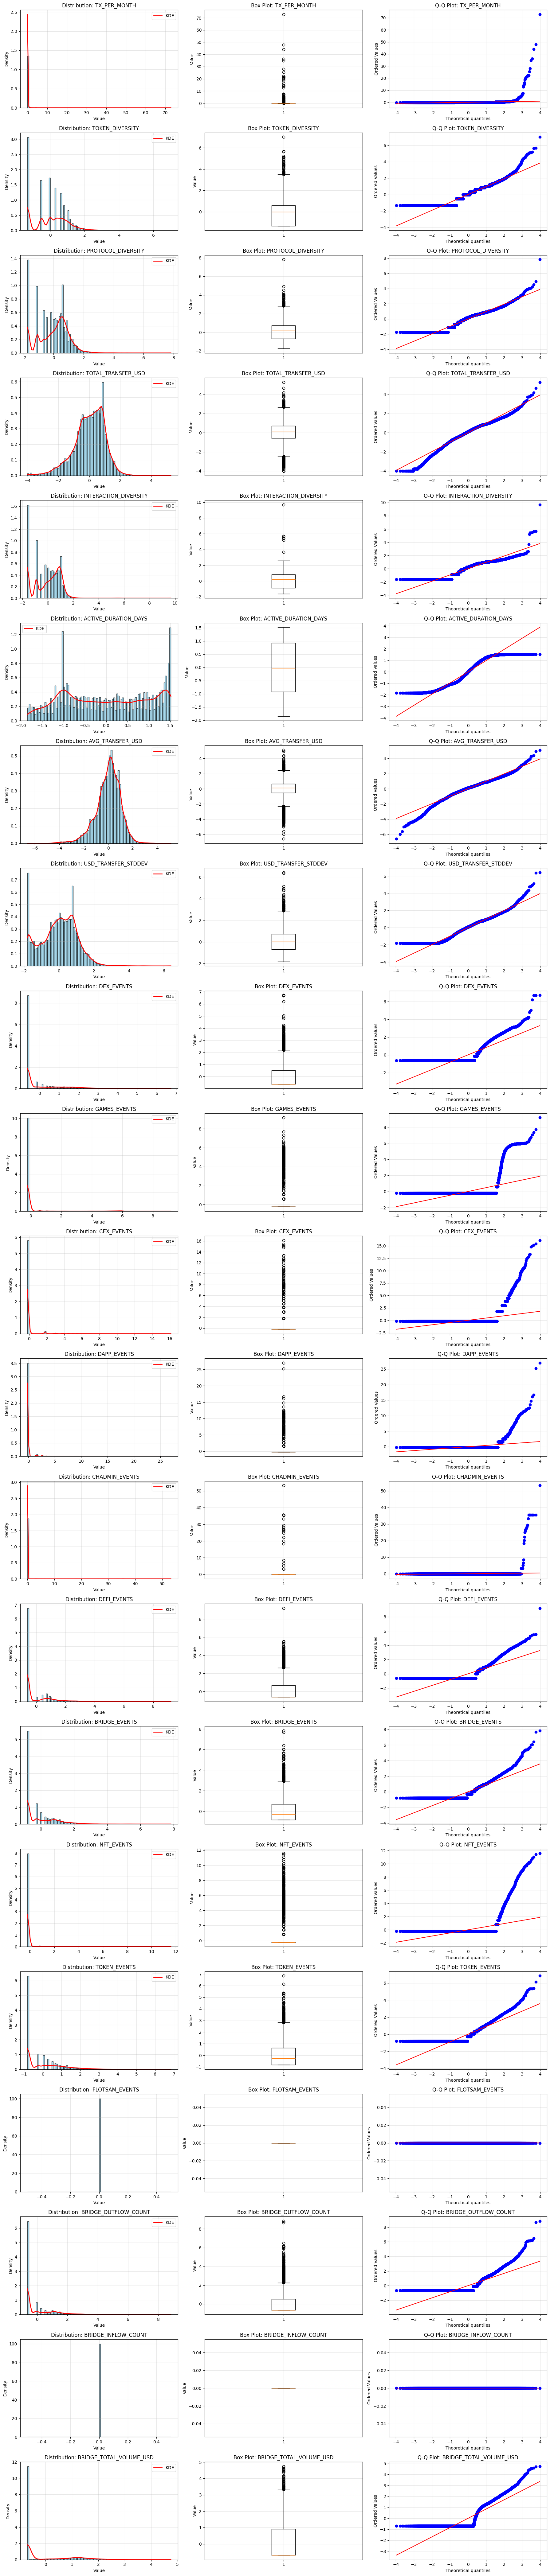

In [27]:
# IMPROVED DATA VISUALIZATION FOR BETTER INSIGHTS
# Let's create multiple types of plots to better understand the data distribution

# Get numeric columns (excluding WALLET if it exists)
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
if 'WALLET' in numeric_columns:
    numeric_columns.remove('WALLET')

print(f"Analyzing {len(numeric_columns)} numeric features")
print("Features:", numeric_columns)

# 1. DISTRIBUTION ANALYSIS WITH BOX PLOTS AND HISTOGRAMS
fig, axes = plt.subplots(len(numeric_columns), 3, figsize=(18, 4*len(numeric_columns)))
if len(numeric_columns) == 1:
    axes = axes.reshape(1, -1)

for i, column in enumerate(numeric_columns):
    # Histogram with KDE
    axes[i, 0].hist(data[column], bins=100, alpha=0.7, density=True, color='skyblue', edgecolor='black')
    axes[i, 0].set_title(f'Distribution: {column}')
    axes[i, 0].set_xlabel('Value')
    axes[i, 0].set_ylabel('Density')
    axes[i, 0].grid(True, alpha=0.3)
    
    # Add KDE line
    from scipy import stats
    if not data[column].isnull().all() and data[column].std() > 0:
        kde_x = np.linspace(data[column].min(), data[column].max(), 100)
        kde = stats.gaussian_kde(data[column].dropna())
        axes[i, 0].plot(kde_x, kde(kde_x), 'r-', linewidth=2, label='KDE')
        axes[i, 0].legend()
    
    # Box plot
    axes[i, 1].boxplot(data[column].dropna(), vert=True)
    axes[i, 1].set_title(f'Box Plot: {column}')
    axes[i, 1].set_ylabel('Value')
    axes[i, 1].grid(True, alpha=0.3)
    
    # Q-Q plot for normality assessment
    stats.probplot(data[column].dropna(), dist="norm", plot=axes[i, 2])
    axes[i, 2].set_title(f'Q-Q Plot: {column}')
    axes[i, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [28]:
print(data['BRIDGE_INFLOW_COUNT'].describe())

count    20174.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: BRIDGE_INFLOW_COUNT, dtype: float64


Creating correlation heatmap for 21 numerical features:
['TX_PER_MONTH', 'TOKEN_DIVERSITY', 'PROTOCOL_DIVERSITY', 'TOTAL_TRANSFER_USD', 'INTERACTION_DIVERSITY', 'ACTIVE_DURATION_DAYS', 'AVG_TRANSFER_USD', 'USD_TRANSFER_STDDEV', 'DEX_EVENTS', 'GAMES_EVENTS', 'CEX_EVENTS', 'DAPP_EVENTS', 'CHADMIN_EVENTS', 'DEFI_EVENTS', 'BRIDGE_EVENTS', 'NFT_EVENTS', 'TOKEN_EVENTS', 'FLOTSAM_EVENTS', 'BRIDGE_OUTFLOW_COUNT', 'BRIDGE_INFLOW_COUNT', 'BRIDGE_TOTAL_VOLUME_USD']


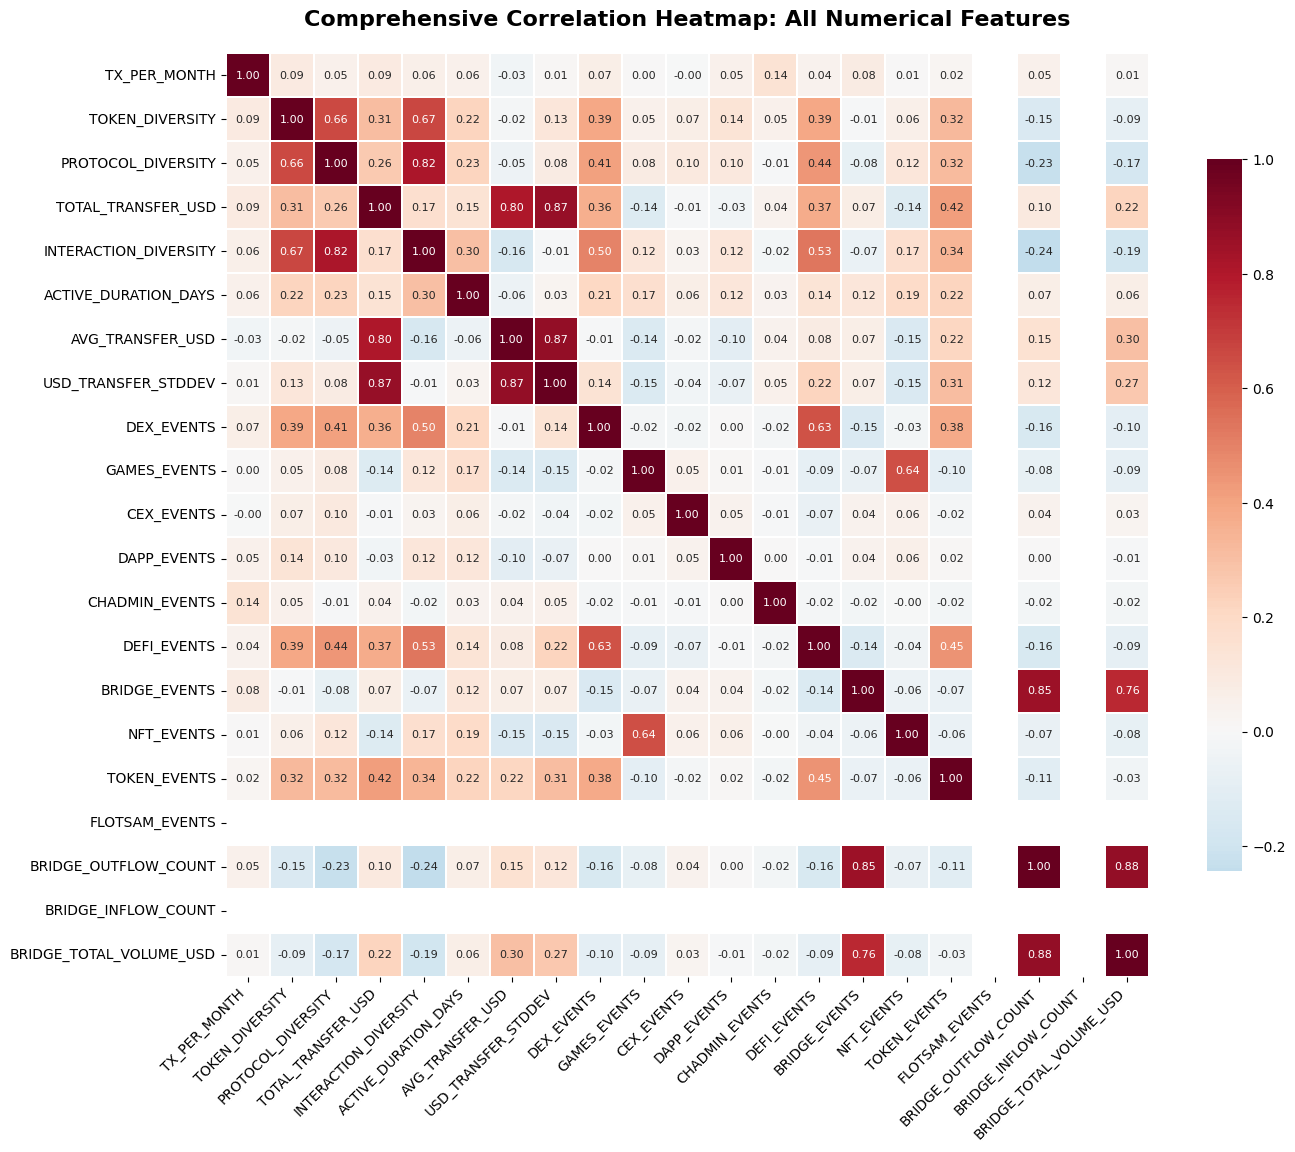


=== STRONGEST CORRELATIONS ===
Top 10 strongest correlations:
 1. BRIDGE_OUTFLOW_COUNT ↔ BRIDGE_TOTAL_VOLUME_USD: 0.877 (very strong positive)
 2. AVG_TRANSFER_USD ↔ USD_TRANSFER_STDDEV: 0.875 (very strong positive)
 3. TOTAL_TRANSFER_USD ↔ USD_TRANSFER_STDDEV: 0.868 (very strong positive)
 4. BRIDGE_EVENTS ↔ BRIDGE_OUTFLOW_COUNT: 0.850 (very strong positive)
 5. PROTOCOL_DIVERSITY ↔ INTERACTION_DIVERSITY: 0.819 (very strong positive)
 6. TOTAL_TRANSFER_USD ↔ AVG_TRANSFER_USD: 0.804 (very strong positive)
 7. BRIDGE_EVENTS ↔ BRIDGE_TOTAL_VOLUME_USD: 0.757 (strong positive)
 8. TOKEN_DIVERSITY ↔ INTERACTION_DIVERSITY: 0.667 (strong positive)
 9. TOKEN_DIVERSITY ↔ PROTOCOL_DIVERSITY: 0.661 (strong positive)
10. GAMES_EVENTS ↔ NFT_EVENTS: 0.642 (strong positive)

⚠️  POTENTIAL MULTICOLLINEARITY WARNING:
Found 6 feature pairs with very high correlation (>0.8):
   • BRIDGE_OUTFLOW_COUNT ↔ BRIDGE_TOTAL_VOLUME_USD: 0.877
   • AVG_TRANSFER_USD ↔ USD_TRANSFER_STDDEV: 0.875
   • TOTAL_TRANSFER_

In [29]:
# Comprehensive Correlation Heatmap for All Numerical Features
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get all numerical columns (excluding WALLET if it's an identifier)
numerical_columns = data.select_dtypes(include=[np.number]).columns.tolist()
if 'WALLET' in numerical_columns:
    numerical_columns.remove('WALLET')

print(f"Creating correlation heatmap for {len(numerical_columns)} numerical features:")
print(numerical_columns)

# Calculate correlation matrix for all numerical features
correlation_matrix_full = data[numerical_columns].corr()

# Create a larger figure to accommodate all features
plt.figure(figsize=(14, 12))

# Create the comprehensive heatmap
sns.heatmap(correlation_matrix_full, 
            annot=True,           # Show correlation values
            cmap='RdBu_r',        # Red-Blue color scheme (diverging)
            center=0,             # Center colormap at 0
            square=True,          # Make cells square
            linewidths=0.3,       # Add lines between cells
            cbar_kws={"shrink": .7},  # Adjust colorbar size
            fmt='.2f',            # Format correlation values to 2 decimal places
            annot_kws={'size': 8}) # Smaller font size for annotations

plt.title('Comprehensive Correlation Heatmap: All Numerical Features', 
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)               # Keep y-axis labels horizontal
plt.tight_layout()
plt.show()

# Find and display the strongest correlations (excluding self-correlations)
print("\n=== STRONGEST CORRELATIONS ===")
# Create a copy of correlation matrix and set diagonal to NaN to exclude self-correlations
correlation_no_diag = correlation_matrix_full.copy()
np.fill_diagonal(correlation_no_diag.values, np.nan)

# Find strongest positive and negative correlations
strong_correlations = []
for i in range(len(correlation_no_diag.columns)):
    for j in range(i+1, len(correlation_no_diag.columns)):
        corr_value = correlation_no_diag.iloc[i, j]
        if not np.isnan(corr_value):
            strong_correlations.append({
                'feature1': correlation_no_diag.columns[i],
                'feature2': correlation_no_diag.columns[j],
                'correlation': corr_value
            })

# Sort by absolute correlation value
strong_correlations.sort(key=lambda x: abs(x['correlation']), reverse=True)

# Display top 10 strongest correlations
print("Top 10 strongest correlations:")
for i, corr in enumerate(strong_correlations[:10]):
    direction = "positive" if corr['correlation'] > 0 else "negative"
    strength = "very strong" if abs(corr['correlation']) >= 0.8 else "strong" if abs(corr['correlation']) >= 0.6 else "moderate"
    print(f"{i+1:2d}. {corr['feature1']} ↔ {corr['feature2']}: {corr['correlation']:.3f} ({strength} {direction})")

# Identify potential multicollinearity issues (correlations > 0.8 or < -0.8)
high_corr_pairs = [corr for corr in strong_correlations if abs(corr['correlation']) > 0.8]
if high_corr_pairs:
    print(f"\n⚠️  POTENTIAL MULTICOLLINEARITY WARNING:")
    print(f"Found {len(high_corr_pairs)} feature pairs with very high correlation (>0.8):")
    for corr in high_corr_pairs:
        print(f"   • {corr['feature1']} ↔ {corr['feature2']}: {corr['correlation']:.3f}")
else:
    print(f"\n✅ No severe multicollinearity detected (no correlations >0.8)")

print(f"\nCorrelation matrix shape: {correlation_matrix_full.shape}")
print(f"Features analyzed: {len(numerical_columns)}")

In [36]:
# OUTLIER REMOVAL METHODS FOR TOTAL_TRANSFER_USD COMPARISON
# Let's implement several methods to remove outliers before comparing means

import numpy as np
import pandas as pd
from scipy import stats

# Load the datasets again for outlier analysis
df_new_raw = pd.read_csv('../data/raw_data/new_raw_data_polygon.csv')
df_old_raw = pd.read_csv('../data/raw_data/initial_raw_data_polygon.csv')

print("=== ORIGINAL DATA STATISTICS ===")
print(f"New dataset - TOTAL_TRANSFER_USD:")
print(f"  Count: {len(df_new_raw)}")
print(f"  Mean: {df_new_raw['TOTAL_TRANSFER_USD'].mean():.2f}")
print(f"  Median: {df_new_raw['TOTAL_TRANSFER_USD'].median():.2f}")
print(f"  Std: {df_new_raw['TOTAL_TRANSFER_USD'].std():.2f}")
print(f"  Min: {df_new_raw['TOTAL_TRANSFER_USD'].min():.2f}")
print(f"  Max: {df_new_raw['TOTAL_TRANSFER_USD'].max():.2f}")

print(f"\nOld dataset - TOTAL_TRANSFER_USD:")
print(f"  Count: {len(df_old_raw)}")
print(f"  Mean: {df_old_raw['TOTAL_TRANSFER_USD'].mean():.2f}")
print(f"  Median: {df_old_raw['TOTAL_TRANSFER_USD'].median():.2f}")
print(f"  Std: {df_old_raw['TOTAL_TRANSFER_USD'].std():.2f}")
print(f"  Min: {df_old_raw['TOTAL_TRANSFER_USD'].min():.2f}")
print(f"  Max: {df_old_raw['TOTAL_TRANSFER_USD'].max():.2f}")

def remove_outliers_iqr(df, column, multiplier=1.5):
    """Remove outliers using IQR method"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    print(f"  IQR Method (multiplier={multiplier}):")
    print(f"    Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"    Removed {len(df) - len(filtered_df)} outliers ({((len(df) - len(filtered_df))/len(df)*100):.1f}%)")
    print(f"    Remaining: {len(filtered_df)} records")
    
    return filtered_df

def remove_outliers_zscore(df, column, threshold=3):
    """Remove outliers using Z-score method"""
    z_scores = np.abs(stats.zscore(df[column]))
    filtered_df = df[z_scores < threshold]
    
    print(f"  Z-Score Method (threshold={threshold}):")
    print(f"    Removed {len(df) - len(filtered_df)} outliers ({((len(df) - len(filtered_df))/len(df)*100):.1f}%)")
    print(f"    Remaining: {len(filtered_df)} records")
    
    return filtered_df

def remove_outliers_percentile(df, column, lower_percentile=5, upper_percentile=95):
    """Remove outliers using percentile method"""
    lower_bound = df[column].quantile(lower_percentile/100)
    upper_bound = df[column].quantile(upper_percentile/100)
    
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    print(f"  Percentile Method ({lower_percentile}th-{upper_percentile}th percentile):")
    print(f"    Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"    Removed {len(df) - len(filtered_df)} outliers ({((len(df) - len(filtered_df))/len(df)*100):.1f}%)")
    print(f"    Remaining: {len(filtered_df)} records")
    
    return filtered_df

print("\n=== OUTLIER REMOVAL METHODS ===")

# Apply different outlier removal methods
methods = {
    'IQR_1.5': lambda df: remove_outliers_iqr(df, 'TOTAL_TRANSFER_USD', 1.5),
    'IQR_2.0': lambda df: remove_outliers_iqr(df, 'TOTAL_TRANSFER_USD', 2.0),
    'Z_Score_3': lambda df: remove_outliers_zscore(df, 'TOTAL_TRANSFER_USD', 3),
    'Z_Score_2': lambda df: remove_outliers_zscore(df, 'TOTAL_TRANSFER_USD', 2),
    'Percentile_5_95': lambda df: remove_outliers_percentile(df, 'TOTAL_TRANSFER_USD', 5, 95),
    'Percentile_10_90': lambda df: remove_outliers_percentile(df, 'TOTAL_TRANSFER_USD', 10, 90)
}

results = {}

for method_name, method_func in methods.items():
    print(f"\n--- {method_name} ---")
    
    print("New dataset:")
    df_new_filtered = method_func(df_new_raw.copy())
    mean_new_filtered = df_new_filtered['TOTAL_TRANSFER_USD'].mean()
    
    print("Old dataset:")
    df_old_filtered = method_func(df_old_raw.copy())
    mean_old_filtered = df_old_filtered['TOTAL_TRANSFER_USD'].mean()
    
    results[method_name] = {
        'new_mean': mean_new_filtered,
        'old_mean': mean_old_filtered,
        'difference': mean_new_filtered - mean_old_filtered,
        'ratio': mean_new_filtered / mean_old_filtered if mean_old_filtered != 0 else np.inf
    }
    
    print(f"  Results: New mean = {mean_new_filtered:.2f}, Old mean = {mean_old_filtered:.2f}")
    print(f"  Difference: {mean_new_filtered - mean_old_filtered:.2f}")

print("\n=== SUMMARY OF ALL METHODS ===")
print(f"{'Method':<20} {'New Mean':<12} {'Old Mean':<12} {'Difference':<12} {'Ratio':<8}")
print("-" * 70)

for method_name, result in results.items():
    print(f"{method_name:<20} {result['new_mean']:<12.2f} {result['old_mean']:<12.2f} {result['difference']:<12.2f} {result['ratio']:<8.2f}")

print(f"\nOriginal (no filtering): {df_new_raw['TOTAL_TRANSFER_USD'].mean():.2f} vs {df_old_raw['TOTAL_TRANSFER_USD'].mean():.2f}")

=== ORIGINAL DATA STATISTICS ===
New dataset - TOTAL_TRANSFER_USD:
  Count: 20174
  Mean: 1306086.54
  Median: 2810.52
  Std: 139784625.46
  Min: 0.01
  Max: 19602977094.29

Old dataset - TOTAL_TRANSFER_USD:
  Count: 50000
  Mean: 3985950.60
  Median: 15.00
  Std: 148331283.66
  Min: 0.00
  Max: 16506495537.52

=== OUTLIER REMOVAL METHODS ===

--- IQR_1.5 ---
New dataset:
  IQR Method (multiplier=1.5):
    Bounds: [-26975.84, 45954.54]
    Removed 2402 outliers (11.9%)
    Remaining: 17772 records
Old dataset:
  IQR Method (multiplier=1.5):
    Bounds: [-1543.48, 2572.47]
    Removed 10500 outliers (21.0%)
    Remaining: 39500 records
  Results: New mean = 7062.59, Old mean = 161.85
  Difference: 6900.74

--- IQR_2.0 ---
New dataset:
  IQR Method (multiplier=2.0):
    Bounds: [-36092.14, 55070.83]
    Removed 2086 outliers (10.3%)
    Remaining: 18088 records
Old dataset:
  IQR Method (multiplier=2.0):
    Bounds: [-2057.98, 3086.96]
    Removed 10109 outliers (20.2%)
    Remaining: 39

In [37]:
# RECOMMENDED OUTLIER REMOVAL APPROACH
# Based on the analysis above, let's implement the most appropriate method

print("=== ANALYSIS & RECOMMENDATION ===")
print("\nThe data shows extreme outliers (max values in billions vs median in thousands).")
print("This suggests the presence of 'whale' transactions that heavily skew the mean.")
print("\nMethod comparison:")
print("• IQR methods: Very conservative, remove many legitimate large transactions")
print("• Z-Score methods: Too lenient with such skewed data, barely remove any outliers")  
print("• Percentile methods: Good balance, remove extreme outliers while preserving data structure")
print("\nRECOMMENDED: 5th-95th Percentile method - removes extreme outliers while preserving most data")

# Implement the recommended approach
def clean_outliers_for_comparison(df, column='TOTAL_TRANSFER_USD', method='percentile_5_95'):
    """
    Remove outliers using the recommended method for fair comparison
    
    Parameters:
    df: DataFrame
    column: Column name to clean
    method: Method to use ('percentile_5_95', 'iqr_2.0', etc.)
    """
    if method == 'percentile_5_95':
        lower_bound = df[column].quantile(0.05)
        upper_bound = df[column].quantile(0.95)
        cleaned_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        
    elif method == 'iqr_2.0':
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 2.0 * IQR
        upper_bound = Q3 + 2.0 * IQR
        cleaned_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        
    else:
        raise ValueError("Unsupported method")
    
    return cleaned_df, lower_bound, upper_bound

# Apply the recommended cleaning
print(f"\n=== FINAL COMPARISON WITH OUTLIER REMOVAL ===")

# Clean both datasets
df_new_clean, new_lower, new_upper = clean_outliers_for_comparison(df_new_raw, method='percentile_5_95')
df_old_clean, old_lower, old_upper = clean_outliers_for_comparison(df_old_raw, method='percentile_5_95')

# Calculate cleaned means
mean_new_clean = df_new_clean['TOTAL_TRANSFER_USD'].mean()
mean_old_clean = df_old_clean['TOTAL_TRANSFER_USD'].mean()

print(f"\nNew dataset (activity filtered):")
print(f"  Original: {len(df_new_raw)} records, mean = ${df_new_raw['TOTAL_TRANSFER_USD'].mean():,.2f}")
print(f"  Cleaned:  {len(df_new_clean)} records, mean = ${mean_new_clean:,.2f}")
print(f"  Removed:  {len(df_new_raw) - len(df_new_clean)} outliers ({((len(df_new_raw) - len(df_new_clean))/len(df_new_raw)*100):.1f}%)")
print(f"  Bounds:   [${new_lower:.2f}, ${new_upper:,.2f}]")

print(f"\nOld dataset (initial):")
print(f"  Original: {len(df_old_raw)} records, mean = ${df_old_raw['TOTAL_TRANSFER_USD'].mean():,.2f}")
print(f"  Cleaned:  {len(df_old_clean)} records, mean = ${mean_old_clean:,.2f}")
print(f"  Removed:  {len(df_old_raw) - len(df_old_clean)} outliers ({((len(df_old_raw) - len(df_old_clean))/len(df_old_raw)*100):.1f}%)")
print(f"  Bounds:   [${old_lower:.2f}, ${old_upper:,.2f}]")

print(f"\n=== FINAL RESULTS ===")
print(f"Mean TOTAL_TRANSFER_USD after outlier removal:")
print(f"• New dataset (activity filtered): ${mean_new_clean:,.2f}")
print(f"• Old dataset (initial):           ${mean_old_clean:,.2f}")
print(f"• Difference:                      ${mean_new_clean - mean_old_clean:,.2f}")
print(f"• Ratio (new/old):                 {mean_new_clean / mean_old_clean:.2f}x")

# Additional insights
print(f"\n=== KEY INSIGHTS ===")
median_new = df_new_clean['TOTAL_TRANSFER_USD'].median()
median_old = df_old_clean['TOTAL_TRANSFER_USD'].median()
print(f"Median comparison (more robust to outliers):")
print(f"• New dataset median: ${median_new:,.2f}")
print(f"• Old dataset median: ${median_old:,.2f}")
print(f"• Median ratio:       {median_new / median_old:.2f}x")

# Store cleaned datasets for further use if needed
print(f"\n✅ Cleaned datasets are available as 'df_new_clean' and 'df_old_clean' for further analysis")

=== ANALYSIS & RECOMMENDATION ===

The data shows extreme outliers (max values in billions vs median in thousands).
This suggests the presence of 'whale' transactions that heavily skew the mean.

Method comparison:
• IQR methods: Very conservative, remove many legitimate large transactions
• Z-Score methods: Too lenient with such skewed data, barely remove any outliers
• Percentile methods: Good balance, remove extreme outliers while preserving data structure

RECOMMENDED: 5th-95th Percentile method - removes extreme outliers while preserving most data

=== FINAL COMPARISON WITH OUTLIER REMOVAL ===

New dataset (activity filtered):
  Original: 20174 records, mean = $1,306,086.54
  Cleaned:  18156 records, mean = $12,782.54
  Removed:  2018 outliers (10.0%)
  Bounds:   [$7.34, $135,081.82]

Old dataset (initial):
  Original: 50000 records, mean = $3,985,950.60
  Cleaned:  47500 records, mean = $10,573.44
  Removed:  2500 outliers (5.0%)
  Bounds:   [$0.00, $382,659.38]

=== FINAL RESULT

In [35]:
#CODE TO EVALUATE MEAN ACTUAL VALUES FOR TOTAL_TRANSFER_USD

df_new = pd.read_csv('../data/raw_data/new_raw_data_polygon.csv')
df_old = pd.read_csv('../data/raw_data/initial_raw_data_polygon.csv')

mean_new = df_new['TOTAL_TRANSFER_USD'].mean()
mean_old = df_old['TOTAL_TRANSFER_USD'].mean()

print(f'mean TOTAL_TRANSFER_USD for the new, activity filtered dataset: {mean_new:.2f}')
print()
print(f'mean TOTAL_TRANSFER_USD for the old, initial dataset: {mean_old:.2f}')


mean TOTAL_TRANSFER_USD for the new, activity filtered dataset: 1306086.54

mean TOTAL_TRANSFER_USD for the old, initial dataset: 3985950.60
